# 01. 绘制面积图 - 近三十年各类枪支产量 - matplotlib 实现

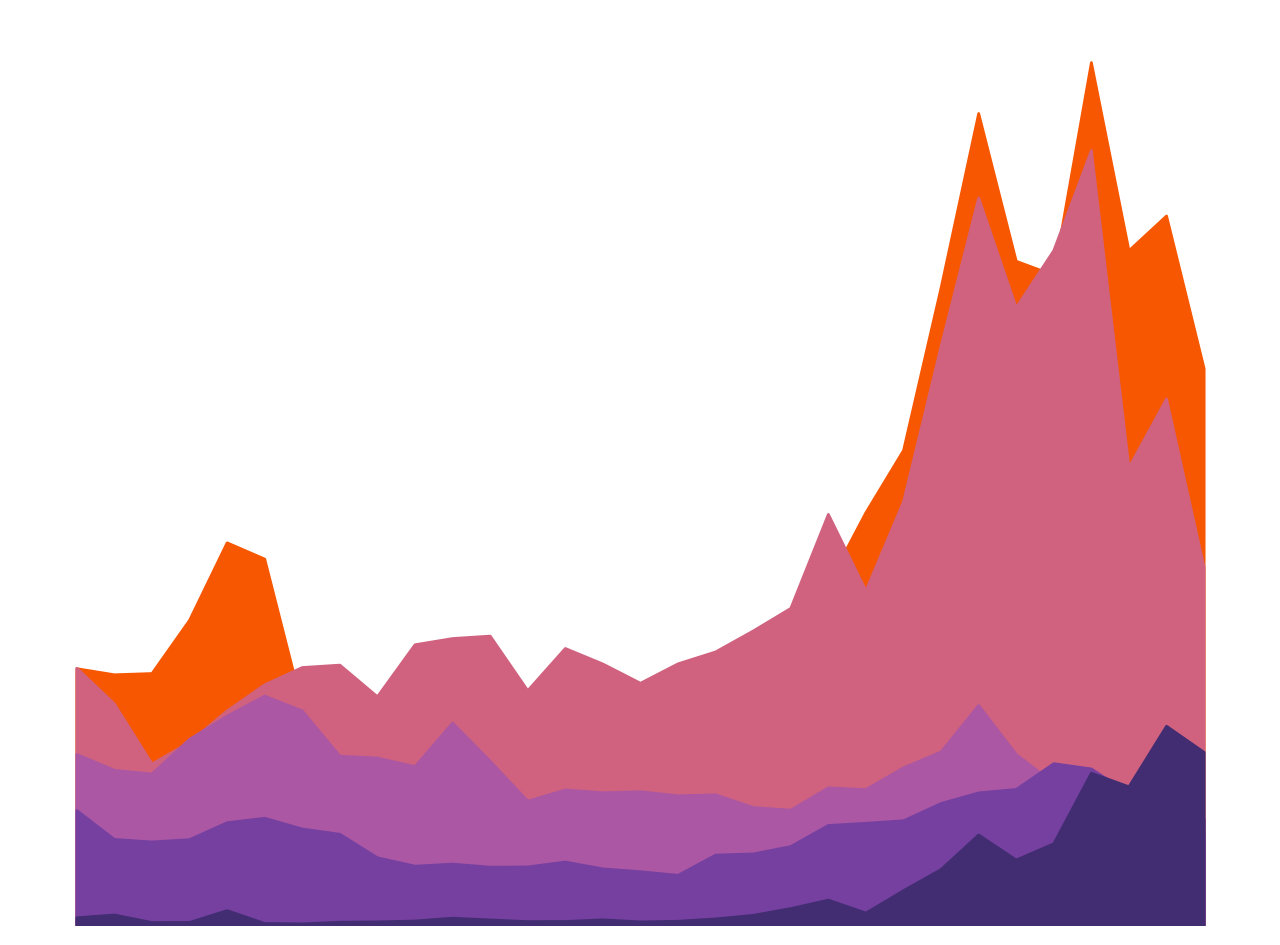

In [56]:
# 01. 读取并整理数据
import pandas as pd
data = pd.read_excel('MARKETS30 Years of Gun Manufacturing in America.xlsx')

# 把两轴数据转为列表类型
x = data['Year'].tolist() 
Pistols = data['Pistols'].tolist()
Rifles = data['Rifles'].tolist()
Shotguns = data['Shotguns'].tolist()
Revolvers = data['Revolvers'].tolist()
MiscFirearms = data['Misc. Firearms'].tolist()

#02. 使用matplotlib 的stackplot 绘制折线面积图
import matplotlib.pyplot as plt

# 建立画布和坐标系，指定图的大小和分辨率
fig,ax = plt.subplots(figsize=(8,6),dpi=200)

ax.stackplot(x,Pistols,color='#f75701')# 指定x轴（年份）和 y 轴（某种枪支的产量）
ax.stackplot(x,Rifles,color='#d0627f')
ax.stackplot(x,Shotguns,color='#ab57a4')
ax.stackplot(x,Revolvers,color='#7640a0')
ax.stackplot(x,MiscFirearms,color='#422d72')
# 关闭两轴显示
ax.set_yticks([])
ax.set_xticks([])
plt.axis('off')
# 保存为矢量格式
plt.savefig('guns.svg')
# 在jupyter notebook中显示图
plt.show()

# 02. 绘制地图 - 各州枪支产量 - pyecharts 实现

In [57]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

# 01. 读取并整理数据
data1 = pd.read_excel('MARKETS30 Years of Gun Manufacturing in America.xlsx',sheet_name='The Geography ')
# 把数据转为列表类型
state = data1['State'].tolist()
license = data1['Licenses (2020)'].tolist()

# 02. 使用 pyecharts map 绘制美国地图
m = (Map(init_opts=opts.InitOpts(bg_color = '#1c1c1c',width='1000px',height='800px'))#地图背景和大小设置
     #传入各州枪支产量，地图类型选择美国
     .add('',[list(i) for i in zip(state,license)],maptype='美国',is_map_symbol_show=False)
     .set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=2300,min_=10,
        is_piecewise=True,# 指定颜色带，仅用白色突出显示top5,其余都为灰色
         pieces=[{'min': 620,'color': 'white'}, {'min': 10, 'max': 620, 'color': 'grey'}]))
     .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
m.render_notebook()# 在jupyter notebook中显示图
# m.render('gun_usa.html')也可以保存为网页格式